# Chicago Crime Data Analysis

## Table of Contents
* Project Description
* libraries
* Data ingestion
* Preliminary Data Analysis
* Exploratory Data Analysis
* Reports

## Libraries

In [2]:
# Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


## Data Ingestion

In [4]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


## Preliminary Data Analysis

In [ ]:
# Data dimension
df.shape

(7784664, 22)

In [ ]:
# Check for missing values
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [ ]:
# Overall stats 
df.describe(include="all")

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7784664,7784664,...,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,2,2,...,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,5749900,6708370,...,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


In [9]:
# Check for duplicates
print("Duplicated count:",df.duplicated().sum())

Duplicated count: 0


In [ ]:
# Check for missing values in case number column
df[df['Case Number'].isna() == True]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4981841,7049552,NaN,07/30/2009 03:00:00 AM,058XX N PAULINA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,40.0,77.0,14,1164170.0,1938694.0,2009,02/28/2018 03:56:25 PM,41.987401,-87.671539,"(41.987401038, -87.671539153)"
5286601,7610078,NaN,07/16/2010 02:56:00 PM,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,2.0,28.0,08B,1172646.0,1898435.0,2010,02/10/2018 03:50:01 PM,41.876745,-87.641559,"(41.876744768, -87.641559043)"
5992794,8475075,NaN,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,31.0,16.0,05,NaN,NaN,2012,05/04/2016 03:48:23 PM,NaN,NaN,NaN
7488610,7014449,NaN,07/10/2009 11:00:00 AM,082XX S HARPER AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,8.0,45.0,08A,1187910.0,1850555.0,2009,02/28/2018 03:56:25 PM,41.745008,-87.587042,"(41.74500765, -87.587041972)"


In [11]:
# Check duplicates in the case number column
first_duplicate = df[df['Case Number'].duplicated() == True]
second_duplicate = df[df['Case Number'].duplicated(keep='last') == True]
full_duplicates_df = pd.concat([first_duplicate, second_duplicate], axis = 0)
full_duplicates_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
5286601,7610078,NaN,07/16/2010 02:56:00 PM,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,2.0,28.0,08B,1172646.0,1898435.0,2010,02/10/2018 03:50:01 PM,41.876745,-87.641559,"(41.876744768, -87.641559043)"
5446727,7928668,HT155546,02/10/2011 11:42:00 AM,059XX W DIVISION ST,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,True,False,...,29.0,25.0,06,1136597.0,1907384.0,2011,02/10/2018 03:50:01 PM,41.902023,-87.773707,"(41.902023021, -87.773706834)"
5992794,8475075,NaN,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,31.0,16.0,05,NaN,NaN,2012,05/04/2016 03:48:23 PM,NaN,NaN,NaN
6860076,11764301,JC326085,06/28/2019 04:15:00 PM,042XX W MADISON ST,0460,BATTERY,SIMPLE,STREET,False,False,...,28.0,26.0,08B,1148193.0,1899677.0,2019,07/24/2019 04:15:49 PM,41.880659,-87.731311,"(41.880658696, -87.731311277)"
6866046,27137,JF445443,10/23/2022 04:28:00 AM,043XX S KEDZIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,15.0,58.0,01A,1155745.0,1875638.0,2022,10/30/2022 04:49:06 PM,41.814544,-87.704227,"(41.814544186, -87.704227463)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506611,27049,JF394963,09/13/2022 09:55:00 PM,005XX E 51ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,4.0,40.0,01A,1180910.0,1871322.0,2022,09/20/2022 04:53:29 PM,41.802158,-87.612053,"(41.80215809, -87.612052585)"
7711194,27274,JF528120,12/30/2022 10:20:00 PM,086XX S CONSTANCE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,8.0,45.0,01A,1190022.0,1848100.0,2022,01/06/2023 03:49:11 PM,41.738220,-87.579382,"(41.738220374, -87.579382217)"
7729488,27316,JG126633,01/23/2023 03:39:00 PM,029XX E 78TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,7.0,43.0,01A,1196973.0,1853908.0,2023,01/30/2023 03:52:36 PM,41.753988,-87.553723,"(41.753988038, -87.55372311)"
7753768,27363,JG168471,02/27/2023 11:15:00 PM,009XX E 80TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,8.0,44.0,01A,1184058.0,1852160.0,2023,03/06/2023 03:47:36 PM,41.749503,-87.601106,"(41.749502746, -87.601106068)"


In [12]:
# Check year info

print('Earliest Year:', df['Year'].min())
print('Latest Year:', df['Year'].max())
print('No of Years:', df['Year'].nunique())

Earliest Year: 2001
Latest Year: 2023
No of Years: 23


## Data Cleaning

In [14]:
#Drop id feature
df.drop('ID', axis = 1, inplace = True)
#No of duplicates after removing ID feature
print('No of Duplicates:', df.duplicated().sum())


No of Duplicates: 160


In [15]:
#Remove duplicates
print('Shape of Data before removing duplicates:', df.shape)
df.drop_duplicates(keep = 'last', inplace = True)
print('Shape of Data after removing duplicates:', df.shape)

Shape of Data before removing duplicates: (7784664, 21)
Shape of Data after removing duplicates: (7784504, 21)


## Exploratory Data Analysis

**Feature Engineering**

## Report

**Question 1**

In [20]:
# Value count od Arrest column
df['Arrest'].value_counts()

Arrest
False    5749850
True     2034654
Name: count, dtype: int64

<Axes: title={'left': 'Solved Cases vs Unsolved Cases'}, xlabel='Arrest', ylabel=' '>

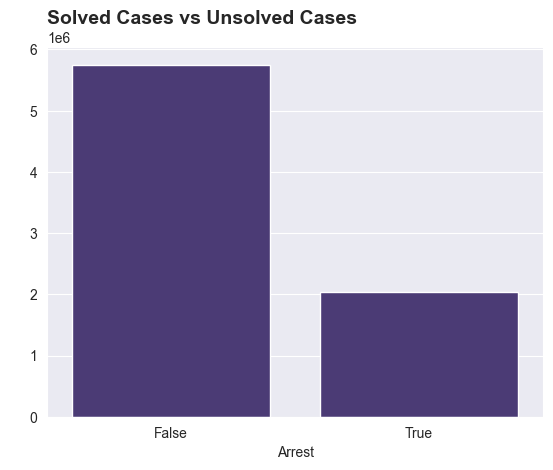

In [23]:
#Visualise Top 10 crimes
df_arrest =  df['Arrest'].value_counts()
plt.title('Solved Cases vs Unsolved Cases', size = 14, loc = 'left', fontweight = 'bold')
plt.ylabel(' ')
sns.set_palette("viridis")
sns.set_style('darkgrid')
sns.barplot(df_arrest)

**Observations**

The number of unresolved cases from the graph above is significant and cannot be overlooked. The number of arrest made is quite smaller when compared with when arrests were made. We need to probe further.

**Question 2**